# Rasters

![alt text](../resources/assets/pakistan.png "Title")

![alt text](../resources/assets/raw3.png "Title")

### Data Exploration

Data Source - [Forests](https://globalmaps.github.io/ptc.html)

Data Source - [Surface_Temperature](https://neo.gsfc.nasa.gov/view.php?datasetId=MOD_LSTD_M&year=2021)

The data is quite old and shows forests from 2003, which is obviously quite a long time ago, however the methods used here will be applicable to other datasets.

- The data is stored in a tif file and the resolution is 30 arcseconds (~1 square km). 
- In each gridpoint of the tif file there is a value between 0–100 corresponding to the percentage tree cover within that 1 square km area. 
- Water bodies are given a value of 254 and no data is given 255.

In [1]:
import rasterio
import numpy as np

forests_file = rasterio.open('../resources/gm_ve_v1.tif')
forests = forests_file.read()

print(np.amin(forests))
print(np.amax(forests))
print(len(np.unique(forests)))

0
254
102


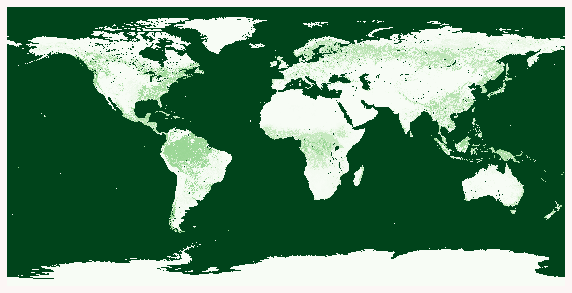

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF', figsize=(10,10))
ax.patch.set_facecolor('#FCF6F5FF')
ax.imshow(forests[0],cmap='Greens',interpolation='nearest')
ax.axis('off')
plt.show()

- The obvious issue is that the oceans have been coloured green and there are clearly no forests there. 
- The data is scaled between 0–100 for the percentage tree coverage but there is an additional data point for the water bodies — 254. 
- When plotting the data matplotlib creates a colourmap with colours scaled linearly between the smallest value (0) and largest value (254) in the dataset. 
- The data that we actually care about is mapped to the first 101 colours (~40% of the colourmap), there are 153 colours that are completely unused (101–253) and one colour is used for the oceans (254). 
- So ~60% of the colours in the colourmap are not used. This is illustrated visually below.

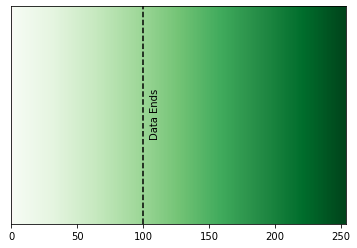

In [3]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib import cm

cmap = cm.get_cmap('Greens', 254)
newcolors = cmap(np.linspace(0, 1, 254))
background_colour = np.array([0.9882352941176471, 
                              0.9647058823529412, 
                              0.9607843137254902, 
                              1.0])
newcolors[:1, :] = background_colour
newcmp_forests = ListedColormap(newcolors)

bounds = np.arange(254)
norm_forests = BoundaryNorm(bounds, newcmp_forests.N)

gradient = np.linspace(0, 1, 254)
gradient = np.vstack((gradient, gradient))
fig, ax = plt.subplots()
ax.imshow(gradient, aspect='auto', cmap=newcmp_forests)
ax.get_yaxis().set_visible(False)
ax.axvline(100, ls="--", c='black', )
plt.text(105, 0.7, "Data Ends", rotation=90)

plt.show()

In [4]:
forests[0][forests[0] == 254] = 0.0

ourcmap = cm.get_cmap('Greens', 101)
newcolors = ourcmap(np.linspace(0, 1, 101))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = background_colour
newcmp_forests = ListedColormap(newcolors)

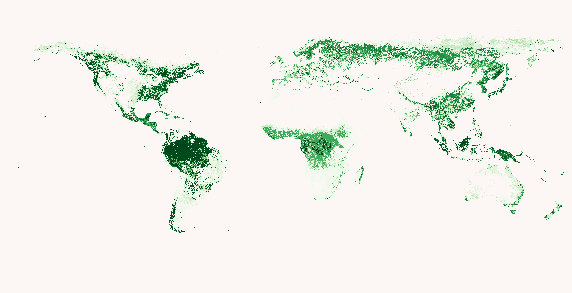

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF', figsize=(10,10))
ax.patch.set_facecolor('#FCF6F5FF')
ax.imshow(forests[0],
                  cmap=newcmp_forests,
                  interpolation='nearest')

ax.axis('off')
plt.show()

In [6]:
import pyproj 
from pyproj import CRS

for x, y in pyproj.pj_list.items():
    print(x, y)

adams_hemi Adams Hemisphere in a Square
adams_ws1 Adams World in a Square I
adams_ws2 Adams World in a Square II
aea Albers Equal Area
aeqd Azimuthal Equidistant
affine Affine transformation
airy Airy
aitoff Aitoff
alsk Modified Stereographic of Alaska
apian Apian Globular I
august August Epicycloidal
axisswap Axis ordering
bacon Bacon Globular
bertin1953 Bertin 1953
bipc Bipolar conic of western hemisphere
boggs Boggs Eumorphic
bonne Bonne (Werner lat_1=90)
calcofi Cal Coop Ocean Fish Invest Lines/Stations
cart Geodetic/cartesian conversions
cass Cassini
cc Central Cylindrical
ccon Central Conic
cea Equal Area Cylindrical
chamb Chamberlin Trimetric
collg Collignon
col_urban Colombia Urban
comill Compact Miller
crast Craster Parabolic (Putnins P4)
defmodel Deformation model
deformation Kinematic grid shift
denoy Denoyer Semi-Elliptical
eck1 Eckert I
eck2 Eckert II
eck3 Eckert III
eck4 Eckert IV
eck5 Eckert V
eck6 Eckert VI
eqearth Equal Earth
eqc Equidistant Cylindrical (Plate Carree)


In [7]:
import rioxarray as rxr
from rasterio.crs import CRS

org_surface_timp_file = rasterio.open('../resources/MOD_LSTD_M_2021-01-01_rgb_3600x1800.TIFF')
org_surface_temp = org_surface_timp_file.read()

surface_temp_file = rxr.open_rasterio('../resources/MOD_LSTD_M_2021-01-01_rgb_3600x1800.TIFF', masked=True).squeeze()

print("Original projection: ", surface_temp_file.rio.crs)
crs_rob = CRS.from_string('+proj=robin')
surface_temp = surface_temp_file.rio.reproject(crs_rob)
print("New projection: ", surface_temp.rio.crs)
surface_temp = surface_temp.to_numpy()

Original projection:  EPSG:4326
New projection:  PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Robinson"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


### Exercise

- Plot the new data and the old data to show the difference in projections
- Fix the colourmap issues
- Generate a new projection

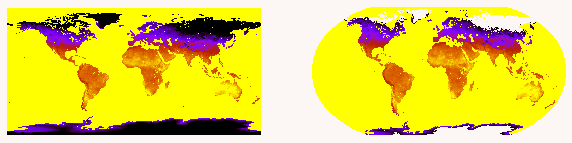

In [8]:
fig = plt.figure(facecolor='#FCF6F5FF', figsize=(10,10))

ax1 = plt.subplot(1,2,1)
ax1.patch.set_facecolor('#FCF6F5FF')
ax1.imshow(org_surface_temp[0], cmap='gnuplot', interpolation='nearest')
ax1.axis('off')

ax2 = plt.subplot(1,2,2)
ax2.patch.set_facecolor('#FCF6F5FF')
ax2.imshow(surface_temp, cmap='gnuplot', interpolation='nearest')
ax2.axis('off')
plt.show()

In [9]:
print(np.amin(org_surface_temp), np.amax(org_surface_temp))
print(org_surface_temp[0,0])
org_surface_temp[org_surface_temp == 255] = 0
surface_temp[surface_temp == 255] = 0

cmap = cm.get_cmap('Reds', 255)
newcolors = cmap(np.linspace(0, 1, 255))

bg_color = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = bg_color
newcmp = ListedColormap(newcolors)
bounds = np.arange(256)
norm = BoundaryNorm(bounds, newcmp.N)

0 255
[255 255 255 ... 255 255 255]


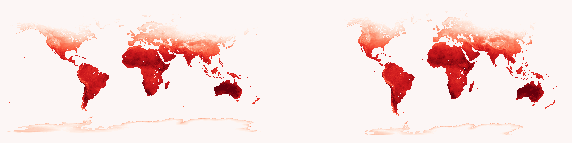

In [10]:
fig = plt.figure(facecolor='#FCF6F5FF', figsize=(10,10))

ax1 = plt.subplot(1,2,1)
ax1.patch.set_facecolor('#FCF6F5FF')
ax1.imshow(org_surface_temp[0], cmap=newcmp, norm=norm, interpolation='nearest')
ax1.axis('off')

ax2 = plt.subplot(1,2,2)
ax2.patch.set_facecolor('#FCF6F5FF')
ax2.imshow(surface_temp, cmap=newcmp, norm=norm, interpolation='nearest')
ax2.axis('off')
plt.show()

In [11]:
import rioxarray as rxr
from rasterio.crs import CRS

surface_temp_file = rxr.open_rasterio('../resources/MOD_LSTD_M_2021-01-01_rgb_3600x1800.TIFF', masked=True).squeeze()

print("Original projection: ", surface_temp_file.rio.crs)
crs_rob = CRS.from_string('+proj=merc')
surface_temp = surface_temp_file.rio.reproject(crs_rob)
print("New projection: ", surface_temp.rio.crs)
surface_temp = surface_temp.to_numpy()

Original projection:  EPSG:4326
New projection:  EPSG:3395


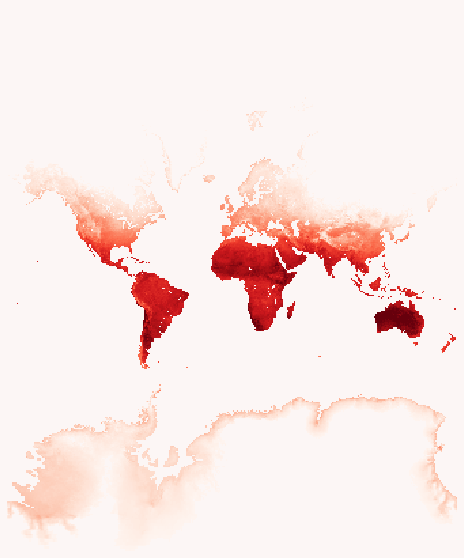

In [12]:
surface_temp[surface_temp == 255] = 0

fig, ax = plt.subplots(facecolor='#FCF6F5FF', figsize=(10,10))
ax.patch.set_facecolor('#FCF6F5FF')
ax.imshow(surface_temp, cmap=newcmp, norm=norm, interpolation='nearest')
ax.axis('off')
ax.set_ylim(2200, 1800)
plt.show()

### Exercise

- Go to https://neo.gsfc.nasa.gov/, pick a dataset and generate a new map

![alt text](../resources/assets/movie.gif "Title")